# Data anaylsis

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
colors_image_formats= ["#F6511D", "#3B8EA5","#7FB800"]
color_browsers = ["#EE6352","#59CD90","#3fa7d6","#FAC05E","#F79D84","#5e5e5e"]

## Aggregate data

In [5]:
folder_path = "./raw_data/websites/"
df_combined = pd.DataFrame()
file_list = os.listdir(folder_path)
column_names = ["run_id","browser","image_format","FCP","TTFB","PLT","fetch_time"]

df_csv_concat = pd.concat([pd.read_csv(folder_path + file, names=column_names) for file in file_list], ignore_index=True)
df_csv_concat = df_csv_concat.sort_values(["run_id"])
df_csv_concat.to_csv("combined_website_performance_data.csv",index=False)

# Visualization of data

### Metric Boxplot per Image_format 

In [6]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, hue="browser",palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

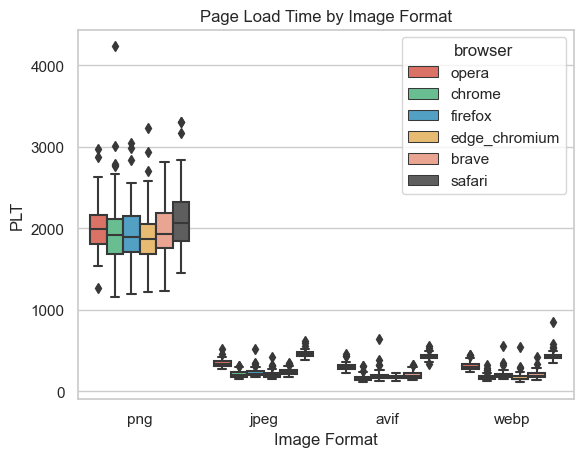

In [7]:
visualize_metrix_boxplot_by_image_format("PLT")

### Boxplot per metric and BROWSER

In [8]:
def boxplot_per_metric_and_browser(metric,browser):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["browser"]==browser]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=colors_image_formats)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

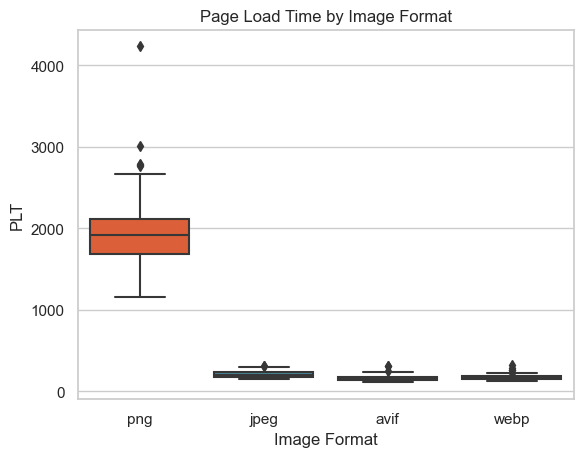

In [9]:
boxplot_per_metric_and_browser('PLT', 'chrome')

### Boxplot per metric and IMAGE_FORMAT

In [10]:
def boxplot_per_metric_and_browser(metric,image_formats):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["image_format"].isin(image_formats)]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="browser", y=metric, hue="image_format", palette="Set1")
    plt.xlabel("Browser")
    plt.ylabel(metric)  
    plt.show()

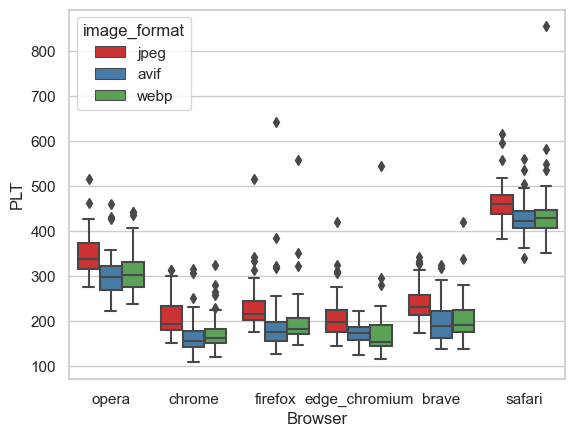

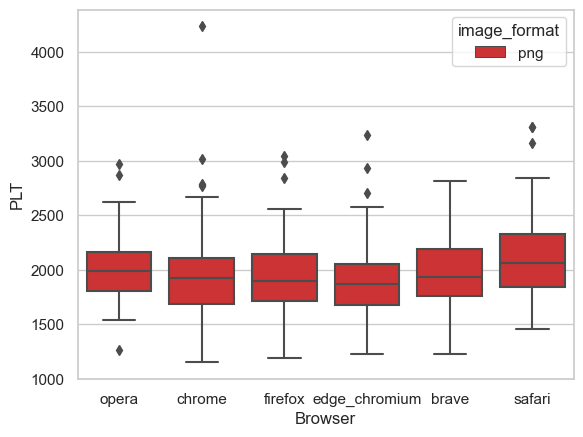

In [11]:
boxplot_per_metric_and_browser("PLT",["jpeg","avif","webp"])
boxplot_per_metric_and_browser("PLT",["png"])